In [1]:
# Max-Lloyd algorithm for finding the optimal quantizer
# in dimension 1

import math
import random
import scipy
import matplotlib.pyplot as plt
from scipy import integrate


 The final quantization pts:[-7.718930280736243, -1.7196620707029497, 1.843343474902322, 7.844105824321014]
 The final decision boundaries: [-4.718930280736245, 0.06220978551377199, 4.844105824321017]


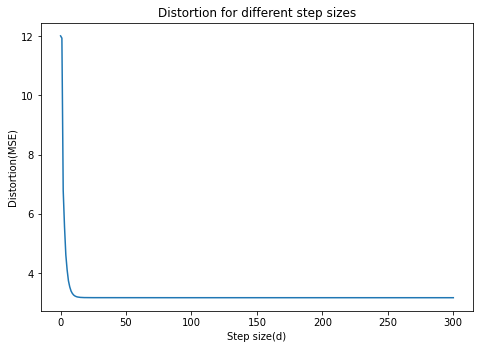

 Value of distortion at optimal step size d: 3.171523279994727


In [2]:

## pdf of the given source function

def laplacian(x):
    return (math.exp(-abs(x)/3.0))/6.0

# function studied: chose between uniform and gaussian functions
def f(t):
    return laplacian(t)

# distribution studied
def random_distrib():
    return random.uniform(-1,1)
    

# computes MSE between 2 adjacent decision thresholds (on one segment)
def interval_MSE(x,t1,t2):
    return integrate.quad(lambda t: ((t - x)**2) * f(t), t1, t2)[0]

# computes mean squared error on R
def MSE(t,x):
    s = interval_MSE(x[0], -float('Inf'), t[0]) + interval_MSE(x[-1], t[-1], float('Inf'))
    for i in range(1,len(x)-1):
        s = s + interval_MSE(x[i], t[i-1], t[i])
    return s

# t1 and t2 are the boundaries of the interval on which the centroid is calculated
def centroid(t1,t2):
    if integrate.quad(f, t1, t2)[0] == 0 or t1 == t2:
        return 0
    else:
        return integrate.quad(lambda t:t*f(t), t1, t2)[0] / integrate.quad(f, t1, t2)[0]

# t is an array containing the initial decision thresholds
# x is an array containing the representation levels
# error_threshold is the threshold to reach for the algorithm to stop
def maxlloyd(t,x,error_threshold):
    e = MSE(t,x)
    error = [e]
    c = 0
    while e > error_threshold and c < 300:
        c = c+1
        if c%2 == 1:
            # adjust thresholds
            for i in range(len(t)):
                t[i] = 0.5 * ( x[i] + x[i+1] )
        else:
            # adjust levels
            x[0] = centroid(-float('Inf'), t[0])
            x[-1] = centroid(t[-1], float('Inf'))
            for i in range(1,len(x)-1):
                x[i] = centroid(t[i-1], t[i])
        e = MSE(t,x)
        error.append(e)
#         print(e)
    return x,t,error


# Test of maxlloyd function
def test_maxlloyd():
    t = [-0.5,0,0.5]
    x = [-1,0,1,1.5]
    x2,t2,error = maxlloyd(t,x,0.01)
    print(f" The final quantization pts:{x2}")
    print(f" The final decision boundaries: {t2}")
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    l1 = ax.plot(error) # solid line with yellow colour and square marker
    ax.set_title("Distortion for different step sizes")
    ax.set_xlabel('Step size(d)')
    ax.set_ylabel('Distortion(MSE)')
    plt.show()
    print(f" Value of distortion at optimal step size d: {error[-1]}")
    return x2,t2

test_maxlloyd()

def estimate(x,t,value):
    for i in range(len(t)):
        if t[i] > value:
            return x[i]
    return x[-1]

# Plot of average error
def plot_avg_error(N):
    x,t = test_maxlloyd()
    avg_E = []
    realizations = []
    square_error = []
    for i in range(N):
        realizations.append(random_distrib())
        square_error.append((realizations[-1] - estimate(x,t,realizations[-1]))**2)
        avg_E.append(sum(square_error)/len(square_error))
    plt.figure(2)
    plt.plot(avg_E)
    plt.show()

# plot_avg_error(20000)